In [ ]:
!pip install ASCA

  Preparing metadata (setup.py) ... done
  Created wheel for ASCA: filename=ASCA-1.0-py3-none-any.whl size=7514 sha256=fa3620bf3c90f0389696ffc81cc0953c168ca2ad905fbdeec72d0069475a9710
  Stored in directory: /root/.cache/pip/wheels/17/49/21/049faaed58f77a5d0274bbd50a153f2ae60b7445cf18647dbd
Successfully built ASCA


In [ ]:
from ASCA.ASCA import ASCA
import numpy as np

#This is the X matrix
X = [[1.0000,0.6000],
[3.0000,0.4000],
[2.0000,0.7000],
[1.0000,0.8000],
[2.0000,0.0100],
[2.0000,0.8000],
[4.0000,1.0000],
[6.0000,2.0000],
[5.0000,0.9000],
[5.0000,1.0000],
[6.0000,2.0000],
[5.0000,0.7000]]
X=np.asarray(X) #make it numpy friendly

#This is the factor matrix
F = [[1,     1],
  [1,     1],
  [1,     2],
  [1,     2],
  [1,     3],
  [1,     3],
  [2,     1],
  [2,     1],
  [2,     2],
  [2,     2],
  [2,     3],
  [2,     3]]
F=np.asarray(F)  #make it numpy friendly
interactions = [[0, 1]]  # Which interaction is considered

ASCA=ASCA() #call function
ASCA.fit(X,F,interactions)  #fit method

# New section

In [ ]:
# How the variables are syntaxed
ASCA.factors
ASCA.factors_explained
ASCA.factors_loadings
ASCA.factors_projected
ASCA.factors_scores
ASCA.factors_singular

ASCA.interactions
ASCA.interaction_explained
ASCA.interaction_loadings
ASCA.interaction_projected
ASCA.interaction_scores
ASCA.factors_singular

ASCA.residuals
ASCA.effects

array([78.62063716, 17.46930751,  0.27607415,  0.28358955,  3.35039163])

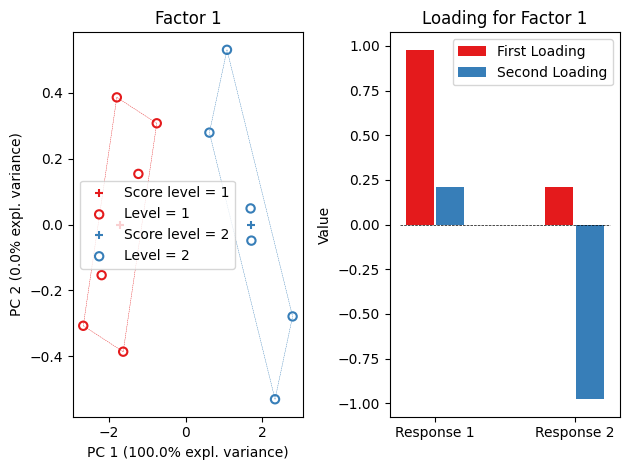

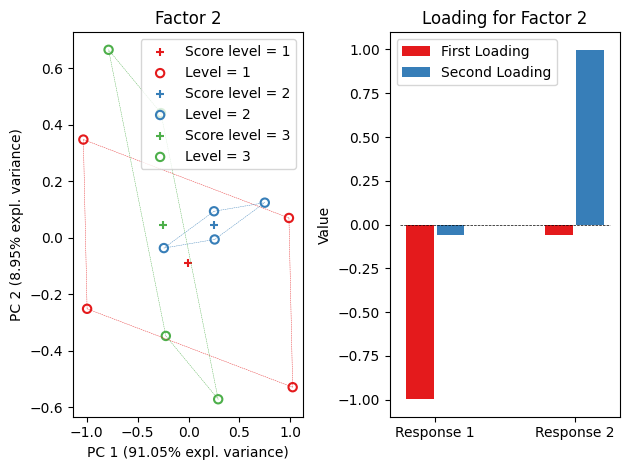

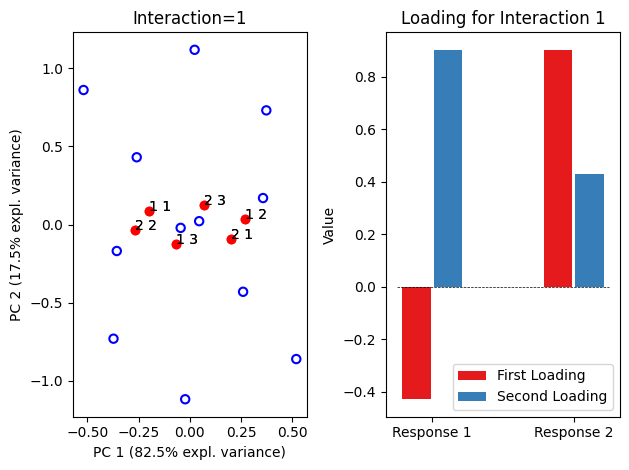

In [ ]:
#Plot factors and interactions
ASCA.plot_factors()
ASCA.plot_interactions()

In [ ]:
print("Shape of factors:", np.array(ASCA.factors).shape)
print("Shape of interactions_array:", interactions_array.shape)
print("Shape of effects:", np.array(ASCA.effects).shape)


Shape of factors: (2, 12, 2)
Shape of interactions_array: (2, 12, 1)
Shape of effects: (5,)


In [ ]:
# Calculate Residual Sum of Squares (RSS)
RSS = np.sum(np.square(ASCA.residuals))

# Calculate the number of parameters
# This may include the number of factors, interactions, and other parameters
num_factors = len(ASCA.factors)
num_interactions = len(ASCA.interactions)
num_effects = len(ASCA.effects)
num_parameters = num_factors + num_interactions + num_effects

# Number of observations
n = X.shape[0]

# Compute AIC and BIC
AIC = n * np.log(RSS / n) + 2 * num_parameters
BIC = n * np.log(RSS / n) + num_parameters * np.log(n)

print("AIC:", AIC)
print("BIC:", BIC)


AIC: 8.983194045405323
BIC: 12.862447243709326


In [ ]:
import numpy as np

# Generate extreme values for X matrix
X_extreme = np.array([
    [1000.0, 0.6],
    [3000.0, 0.4],
    [2000.0, 0.7],
    [1000.0, 0.8],
    [2000.0, 0.01],
    [2000.0, 0.8],
    [4000.0, 1.0],
    [6000.0, 2.0],
    [5000.0, 0.9],
    [5000.0, 1.0],
    [6000.0, 2.0],
    [5000.0, 0.7]
])

# This is the factor matrix (same as before)
F = [
    [1, 1],
    [1, 1],
    [1, 2],
    [1, 2],
    [1, 3],
    [1, 3],
    [2, 1],
    [2, 1],
    [2, 2],
    [2, 2],
    [2, 3],
    [2, 3]
]
F = np.array(F)  # Make it numpy friendly

# This is the interaction matrix (same as before)
interactions = [[0, 1]]  # Which interaction is considered

# Print extreme X matrix
print("Extreme X matrix:")
print(X_extreme)


Extreme X matrix:
[[1.e+03 6.e-01]
 [3.e+03 4.e-01]
 [2.e+03 7.e-01]
 [1.e+03 8.e-01]
 [2.e+03 1.e-02]
 [2.e+03 8.e-01]
 [4.e+03 1.e+00]
 [6.e+03 2.e+00]
 [5.e+03 9.e-01]
 [5.e+03 1.e+00]
 [6.e+03 2.e+00]
 [5.e+03 7.e-01]]


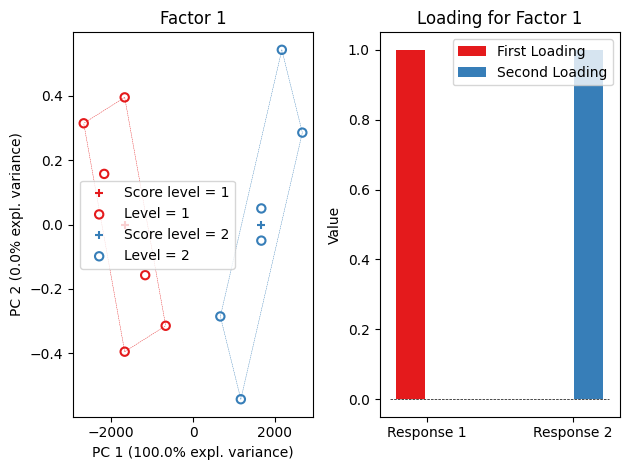

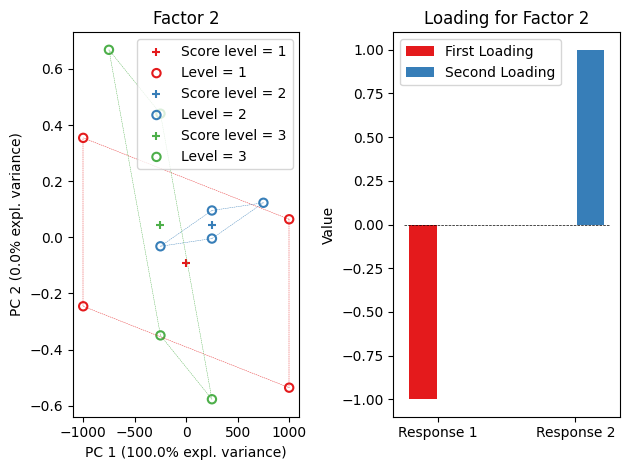

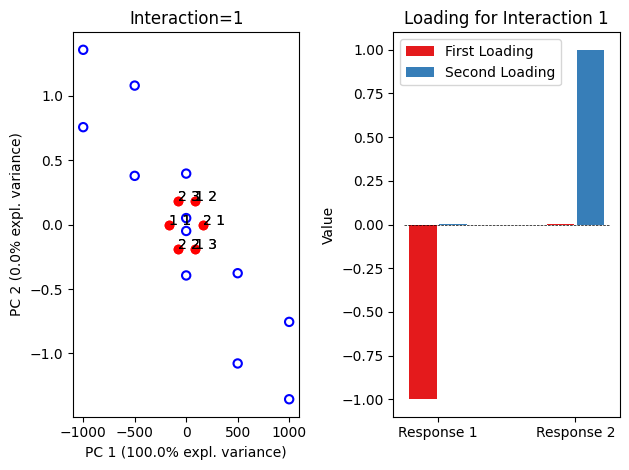

In [ ]:
from ASCA.ASCA import ASCA

# Apply ASCA to the extreme dataset
ASCA_extreme = ASCA()
ASCA_extreme.fit(X_extreme, F, interactions)

# Plot factors and interactions
ASCA_extreme.plot_factors()
ASCA_extreme.plot_interactions()

In [ ]:
# Get the factors predicted by the ASCA model
factors_predicted = np.array(ASCA_extreme.factors)

# Calculate Residual Sum of Squares (RSS)
residuals_extreme = ASCA_extreme.residuals
RSS_extreme = np.sum(np.square(residuals_extreme))

# Number of observations
n_extreme = X_extreme.shape[0]

# Compute AIC and BIC
num_factors_extreme = factors_predicted.shape[2]
num_interactions_extreme = len(ASCA_extreme.interactions)
num_effects_extreme = len(ASCA_extreme.effects)
num_parameters_extreme = num_factors_extreme + num_interactions_extreme + num_effects_extreme

AIC_extreme_factors = n_extreme * np.log(RSS_extreme / n_extreme) + 2 * num_parameters_extreme
BIC_extreme_factors = n_extreme * np.log(RSS_extreme / n_extreme) + num_parameters_extreme * np.log(n_extreme)

print("AIC for extreme dataset with factors:", AIC_extreme_factors)
print("BIC for extreme dataset with factors:", BIC_extreme_factors)

AIC for extreme dataset with factors: 171.2805058962438
BIC for extreme dataset with factors: 175.1597590945478


In [ ]:
# Generate extreme values for X matrix
X_extreme = np.array([
    [10000.0, 0.6],
    [30000.0, 0.4],
    [20000.0, 0.7],
    [10000.0, 0.8],
    [20000.0, 0.01],
    [20000.0, 0.8],
    [40000.0, 1.0],
    [60000.0, 2.0],
    [50000.0, 0.9],
    [50000.0, 1.0],
    [60000.0, 2.0],
    [50000.0, 0.7]
])

# Factor matrix
F = [
    [1, 1],
    [1, 1],
    [1, 2],
    [1, 2],
    [1, 3],
    [1, 3],
    [2, 1],
    [2, 1],
    [2, 2],
    [2, 2],
    [2, 3],
    [2, 3]
]
F = np.array(F)  # Make it numpy friendly

# Interaction matrix
interactions = [[0, 1]]  # Which interaction is considered


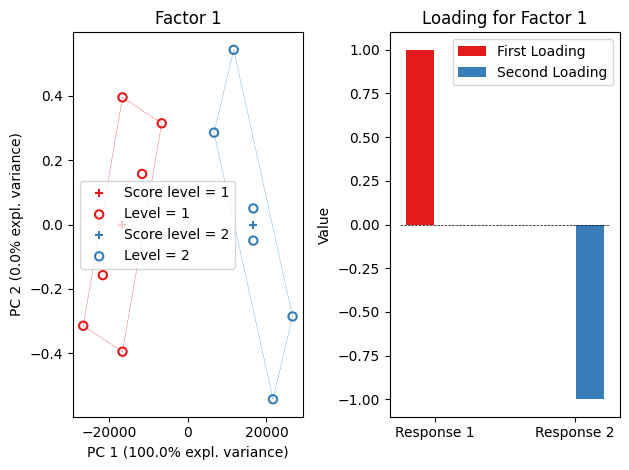

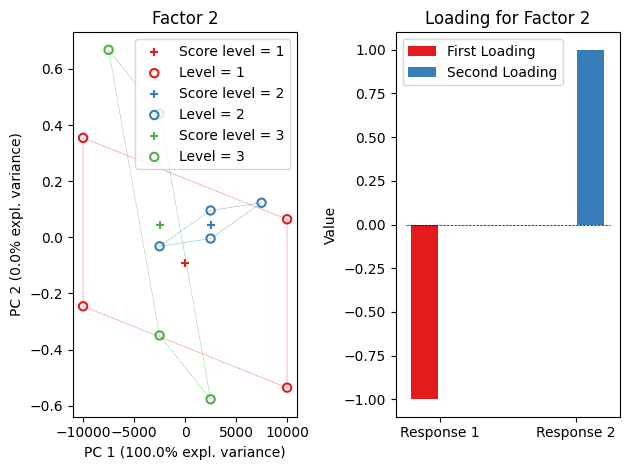

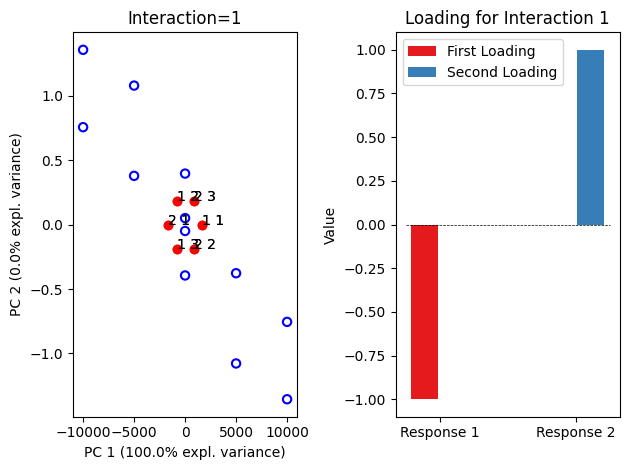

AIC: 226.5425441196708
BIC: 230.4217973179748


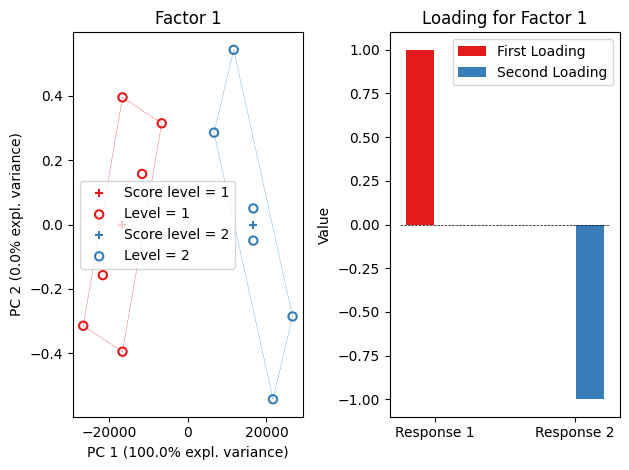

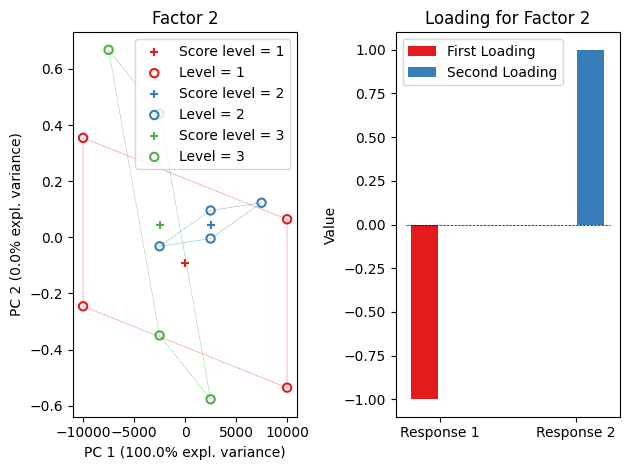

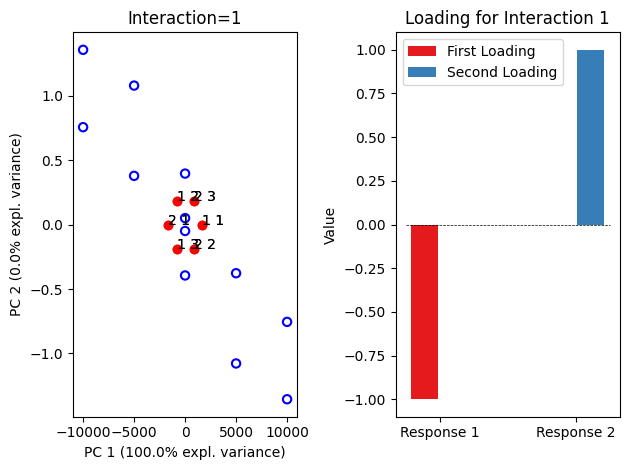

AIC for extreme dataset with outlier detection: 226.5425441196708
BIC for extreme dataset with outlier detection: 230.4217973179748


In [ ]:
# Create an instance of ASCAWithOutlierDetection
ASCA_extreme_with_outlier_detection = ASCAWithOutlierDetection()

# Apply ASCA to the extreme dataset with outlier detection
ASCA_extreme_with_outlier_detection.fit_with_outlier_detection(X_extreme, F, interactions)

# Plot factors and interactions
ASCA_extreme_with_outlier_detection.plot_factors()
ASCA_extreme_with_outlier_detection.plot_interactions()

# Get the factors predicted by the ASCA model
factors_predicted_extreme = np.array(ASCA_extreme_with_outlier_detection.factors)

# Calculate Residual Sum of Squares (RSS)
residuals_extreme = ASCA_extreme_with_outlier_detection.residuals
RSS_extreme = np.sum(np.square(residuals_extreme))

# Number of observations
n_extreme = X_extreme.shape[0]

# Compute AIC and BIC
num_factors_extreme = factors_predicted_extreme.shape[2]
num_interactions_extreme = len(ASCA_extreme_with_outlier_detection.interactions)
num_effects_extreme = len(ASCA_extreme_with_outlier_detection.effects)
num_parameters_extreme = num_factors_extreme + num_interactions_extreme + num_effects_extreme

AIC_extreme_with_outlier_detection = n_extreme * np.log(RSS_extreme / n_extreme) + 2 * num_parameters_extreme
BIC_extreme_with_outlier_detection = n_extreme * np.log(RSS_extreme / n_extreme) + num_parameters_extreme * np.log(n_extreme)

print("AIC for extreme dataset with outlier detection:", AIC_extreme_with_outlier_detection)
print("BIC for extreme dataset with outlier detection:", BIC_extreme_with_outlier_detection)


In [ ]:
# Generate extreme values for X matrix
X_extreme = np.array([
    [10000.0, 0.6],
    [30000.0, 0.4],
    [20000.0, 0.7],
    [10000.0, 0.8],
    [20000.0, 0.01],
    [20000.0, 0.8],
    [40000.0, 1.0],
    [60000.0, 2.0],
    [50000.0, 0.9],
    [50000.0, 1.0],
    [60000.0, 2.0],
    [50000.0, 0.7]
])

# Factor matrix
F = [
    [1, 1],
    [1, 1],
    [1, 2],
    [1, 2],
    [1, 3],
    [1, 3],
    [2, 1],
    [2, 1],
    [2, 2],
    [2, 2],
    [2, 3],
    [2, 3]
]
F = np.array(F)  # Make it numpy friendly

# Interaction matrix
interactions = [[0, 1]]  # Which interaction is considered


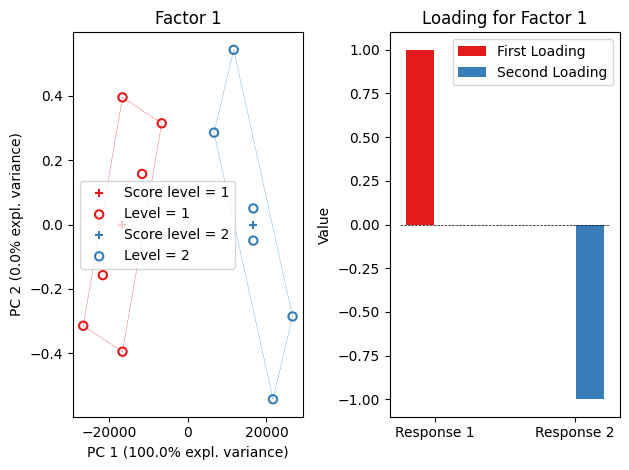

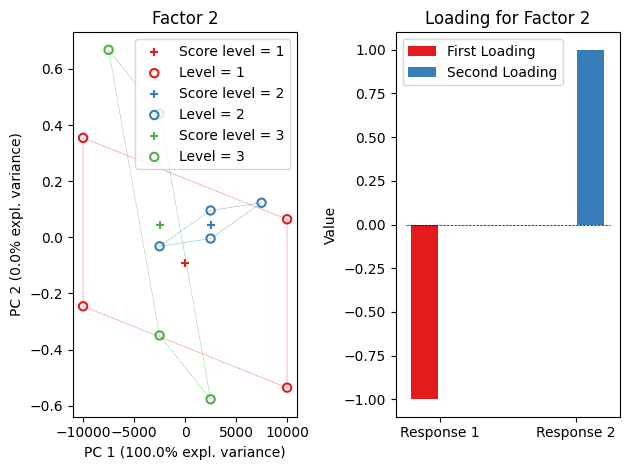

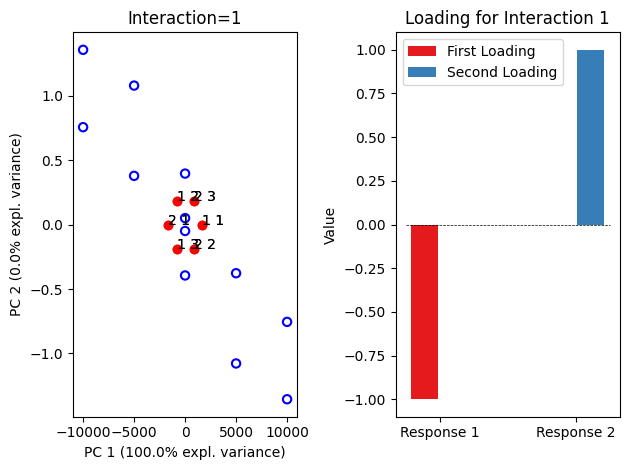

AIC: 226.5425441196708
BIC: 230.4217973179748
Indices of extreme values: []


In [ ]:
class ASCAWithOutlierDetection(ASCA):
    def __init__(self, alpha=0.01):
        super().__init__()
        self.alpha = alpha  # Significance level for outlier detection

    def _mahalanobis_distance(self, X):
        # Compute the empirical covariance matrix
        cov = EmpiricalCovariance().fit(X)

        # Compute Mahalanobis distance for each sample
        mahalanobis_dist = cov.mahalanobis(X)

        return mahalanobis_dist

    def detect_outliers(self, X):
        # Calculate Mahalanobis distances
        mahalanobis_dist = self._mahalanobis_distance(X)

        # Set the threshold for outlier detection based on chi-squared distribution
        threshold = chi2.ppf( - self.alpha, df=X.shape[1])

        # Identify outliers based on the threshold
        outliers = mahalanobis_dist > threshold

        return outliers

    def fit_with_outlier_detection(self, X, F, interactions):
        # Detect outliers
        outliers = self.detect_outliers(X)

        # Remove outliers from the dataset
        X_filtered = X[~outliers]

        # Fit ASCA model with the filtered data
        super().fit(X_filtered, F, interactions)

        # Plot factors and interactions
        self.factors = np.array(self.factors)
        self.plot_factors()
        self.plot_interactions()

        # Calculate AIC and BIC
        residuals = self.residuals
        RSS = np.sum(np.square(residuals))
        n = X_filtered.shape[0]
        num_factors = self.factors.shape[2]
        num_interactions = len(interactions)
        num_effects = len(self.effects)
        num_parameters = num_factors + num_interactions + num_effects

        AIC = n * np.log(RSS / n) + 2 * num_parameters
        BIC = n * np.log(RSS / n) + num_parameters * np.log(n)

        print("AIC:", AIC)
        print("BIC:", BIC)

    def check_for_extreme_values(self, X, criteria='z-score', threshold=3):
        if criteria == 'z-score':
            z_scores = np.abs((X - np.mean(X, axis=0)) / np.std(X, axis=0))
            extreme_indices = np.argwhere(z_scores > threshold)
            return extreme_indices
        else:
            raise ValueError("Invalid criteria. Supported criteria: 'z-score'")

# Create an instance of ASCAWithOutlierDetection
ASCA_extreme_with_outlier_detection = ASCAWithOutlierDetection()

# Apply ASCA to the extreme dataset with outlier detection
ASCA_extreme_with_outlier_detection.fit_with_outlier_detection(X_extreme, F, interactions)

# Check for extreme values
extreme_indices = ASCA_extreme_with_outlier_detection.check_for_extreme_values(X_extreme, criteria='z-score', threshold=3)
print("Indices of extreme values:", extreme_indices)
